# Employee Over-Time prediction



In [42]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [43]:
# read the dataset
full_data = pd.read_csv('dataset.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
full_data.describe(include='all')

# total 50341 rows including test + train

,RowID,Joblevel,DistancetoHome,istrain,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,...,ExtraTime,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
count,50341.000000,50341.000000,50341.000000,50341.000000,50341,50341,50341.000000,50341.000000,50341.000000,50341.000000,...,40303,50341,50341.000000,50341.000000,50341,50341.000000,50341.000000,50341,50341.000000,50341
unique,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,...,2,1486,NaN,NaN,1234,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,NaN,Less,Male,NaN,NaN,NaN,NaN,...,No,4/26/2004,NaN,NaN,7/29/2009,NaN,NaN,Life Sciences,NaN,Married
freq,NaN,NaN,NaN,NaN,37816,27731,NaN,NaN,NaN,NaN,...,21852,208,NaN,NaN,199,NaN,NaN,22831,NaN,23267
mean,25171.000000,1.905941,9.312926,0.800600,NaN,NaN,2.892434,13673.422975,1.774597,2.684750,...,NaN,NaN,796.222860,2.711368,NaN,0.728154,5857.831310,NaN,3.161856,NaN
std,14532.339287,1.043793,7.712078,0.399553,NaN,NaN,1.031145,6546.262386,2.814089,0.713079,...,NaN,NaN,624.172002,0.981657,NaN,0.859530,4341.123001,NaN,0.368322,NaN
min,1.000000,1.000000,1.000000,0.000000,NaN,NaN,1.000000,2094.000000,0.000000,1.000000,...,NaN,NaN,1.000000,1.000000,NaN,0.000000,1074.000000,NaN,3.000000,NaN
25%,12586.000000,1.000000,3.000000,1.000000,NaN,NaN,2.000000,8649.000000,0.000000,2.000000,...,NaN,NaN,234.000000,2.000000,NaN,0.000000,2826.000000,NaN,3.000000,NaN
50%,25171.000000,2.000000,7.000000,1.000000,NaN,NaN,3.000000,13044.000000,1.000000,3.000000,...,NaN,NaN,650.000000,3.000000,NaN,1.000000,4285.000000,NaN,3.000000,NaN
75%,37756.000000,2.000000,14.000000,1.000000,NaN,NaN,4.000000,18991.000000,2.000000,3.000000,...,NaN,NaN,1297.000000,3.000000,NaN,1.000000,6852.000000,NaN,3.000000,NaN


total 50341 rows including test + train

Columns to remove

RowID, StandardHours, DateCollected (first create a variable and then remove), Over18 - all of them have constant value

In [45]:
# total months between two dates
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [46]:
# create date data collected into a variable
date_data_collected = full_data.datacollected[0]
print(date_data_collected)

3/20/2014


In [47]:
# convert to proper date object
from  datetime import date
import datetime
format_string = '%m/%d/%Y'
date_data_collected = datetime.datetime.strptime(date_data_collected, format_string)
print('in Date object form: ')
print(date_data_collected)

in Date object form: 
2014-03-20 00:00:00


In [48]:
# let us calculate total experience in months for each employee

first_job_date = full_data.FirstJobDate.apply(
    lambda x:datetime.datetime.strptime(x, format_string))

total_experience_in_months = first_job_date.apply(lambda x:diff_month(date_data_collected, x))

In [49]:
print(total_experience_in_months.shape)
print(total_experience_in_months[0])

(50341,)
140


In [50]:
# calculate all the new features on the commbined data itself much more cleaner that way

# first create total experience column
full_data['total_experience_in_months'] = total_experience_in_months

In [51]:
print(full_data.shape)

(50341, 37)


In [52]:
# now calculate total experience in the company
current_job_join_date = full_data.DateOfjoiningintheCurrentCompany.apply(
    lambda x:datetime.datetime.strptime(x, format_string))

in_current_job_months = current_job_join_date.apply(lambda x:diff_month(date_data_collected, x))


In [53]:
print(in_current_job_months.shape)
print(in_current_job_months[0])

(50341,)
10


In [54]:
# first create current job experience
full_data['months_in_current_job'] = in_current_job_months
print(full_data.shape)

(50341, 38)


In [55]:
# now remove some of the features in full_data before splitting 
# just for convenience sake, not removing ID column now though

prepared_full_data = full_data.drop(labels = ['FirstJobDate','DateOfjoiningintheCurrentCompany', 
                                              'EmployeeID', 'Over18','EmployeeCount','StandardHours','datacollected'], axis=1)

In [56]:
print(prepared_full_data.shape)
print(prepared_full_data.columns)

(50341, 31)
Index(['RowID', 'Joblevel', 'DistancetoHome', 'istrain', 'FrequencyofTravel',
       'Gender', 'OfficeAmbienceRating', 'MonthlyRate',
       'YearsSinceLastPromotion', 'SelfMotivationRating', 'Division',
       'Hourlyrate', 'JobRole', 'RelationshipSatisfaction', 'Education',
       'No.ofWorkshopsAttended', 'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'ExtraTime', 'Happynesslevelinjob', 'ESOps',
       'MonthlyIncome', 'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job'],
      dtype='object')


In [57]:
# now use prepared_full_data for further processing

In [58]:
# Now split data into train, test using the istrain value
train_x_initial = prepared_full_data.loc[full_data.istrain == 1]
test_x_initial = prepared_full_data.loc[full_data.istrain != 1]


In [59]:
# check row counts
print('train initial: ',train_x_initial.shape)
print('test initial: ', test_x_initial.shape)

# the split is correct

train initial:  (40303, 31)
test initial:  (10038, 31)


In [60]:
# check NA values in test and train
print(train_x_initial.isna().sum())

RowID                         0
Joblevel                      0
DistancetoHome                0
istrain                       0
FrequencyofTravel             0
Gender                        0
OfficeAmbienceRating          0
MonthlyRate                   0
YearsSinceLastPromotion       0
SelfMotivationRating          0
Division                      0
Hourlyrate                    0
JobRole                       0
RelationshipSatisfaction      0
Education                     0
No.ofWorkshopsAttended        0
Age                           0
YearsInCurrentRole            0
NumberofCompaniesChanged      0
WorkLifeBalance               0
Emolumnet_in_Pecentage        0
DialyRate                     0
ExtraTime                     0
Happynesslevelinjob           0
ESOps                         0
MonthlyIncome                 0
Specialization                0
PerformanceRating             0
MaritalStatus                 0
total_experience_in_months    0
months_in_current_job         0
dtype: i

In [61]:
# test NA values
print(test_x_initial.isna().sum())

RowID                             0
Joblevel                          0
DistancetoHome                    0
istrain                           0
FrequencyofTravel                 0
Gender                            0
OfficeAmbienceRating              0
MonthlyRate                       0
YearsSinceLastPromotion           0
SelfMotivationRating              0
Division                          0
Hourlyrate                        0
JobRole                           0
RelationshipSatisfaction          0
Education                         0
No.ofWorkshopsAttended            0
Age                               0
YearsInCurrentRole                0
NumberofCompaniesChanged          0
WorkLifeBalance                   0
Emolumnet_in_Pecentage            0
DialyRate                         0
ExtraTime                     10038
Happynesslevelinjob               0
ESOps                             0
MonthlyIncome                     0
Specialization                    0
PerformanceRating           

In [62]:
print(train_x_initial.columns)

Index(['RowID', 'Joblevel', 'DistancetoHome', 'istrain', 'FrequencyofTravel',
       'Gender', 'OfficeAmbienceRating', 'MonthlyRate',
       'YearsSinceLastPromotion', 'SelfMotivationRating', 'Division',
       'Hourlyrate', 'JobRole', 'RelationshipSatisfaction', 'Education',
       'No.ofWorkshopsAttended', 'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'ExtraTime', 'Happynesslevelinjob', 'ESOps',
       'MonthlyIncome', 'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job'],
      dtype='object')


In [63]:
# drop istrain column fromm both test and train
train_x_initial = train_x_initial.drop(['istrain'], axis=1)
test_x_initial = test_x_initial.drop(['istrain'], axis=1)

In [64]:
print(train_x_initial.shape)
print(test_x_initial.shape)

(40303, 30)
(10038, 30)


In [65]:
# prepare submittion data frame

submittion_df = test_x_initial[['RowID', 'ExtraTime']].copy()

In [66]:
print(submittion_df.shape)
print(submittion_df.columns)

(10038, 2)
Index(['RowID', 'ExtraTime'], dtype='object')


In [67]:
# now we can drop Row ID and Extra time from Test
test_x_initial = test_x_initial.drop(['RowID', 'ExtraTime'], axis=1)

In [68]:
train_x_initial = train_x_initial.drop(['RowID'],axis=1)

In [69]:
# cheeck shape of test and train
print(test_x_initial.shape)
print(train_x_initial.shape)

# train has ExtraTime (target column) as extra

(10038, 28)
(40303, 29)


In [70]:
# again check for NA values in test and train
print('train :', train_x_initial.isna().sum())
print('test :', test_x_initial.isna().sum())

# there are no NA values in either train or test

train : Joblevel                      0
DistancetoHome                0
FrequencyofTravel             0
Gender                        0
OfficeAmbienceRating          0
MonthlyRate                   0
YearsSinceLastPromotion       0
SelfMotivationRating          0
Division                      0
Hourlyrate                    0
JobRole                       0
RelationshipSatisfaction      0
Education                     0
No.ofWorkshopsAttended        0
Age                           0
YearsInCurrentRole            0
NumberofCompaniesChanged      0
WorkLifeBalance               0
Emolumnet_in_Pecentage        0
DialyRate                     0
ExtraTime                     0
Happynesslevelinjob           0
ESOps                         0
MonthlyIncome                 0
Specialization                0
PerformanceRating             0
MaritalStatus                 0
total_experience_in_months    0
months_in_current_job         0
dtype: int64
test : Joblevel                      0
DistancetoHo

In [71]:
target_column = train_x_initial.ExtraTime
# remove target column 
train_x_initial_without_target = train_x_initial.drop(['ExtraTime'], axis=1)

In [72]:
# now split train into validataion and train

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x_initial_without_target, target_column, 
                                                  test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Validation Features Shape:', val_x.shape)
print('Validation Target Shape:', val_y.shape)

Training Features Shape: (30227, 28)
Training Labels Shape: (30227,)
Validation Features Shape: (10076, 28)
Validation Target Shape: (10076,)


In [73]:
print(test_x_initial.shape)

(10038, 28)


In [74]:
test_x = test_x_initial.copy(deep=True)

In [75]:
# all 3 sets have similar columns now
print('train columns: ', train_x.columns)
print('val columns: ', val_x.columns)
print('test columns: ', test_x.columns)
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Validation Features Shape:', val_x.shape)
print('Validation Target Shape:', val_y.shape)

print('Test Features Shape:', test_x.shape)


train columns:  Index(['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole', 'NumberofCompaniesChanged',
       'WorkLifeBalance', 'Emolumnet_in_Pecentage', 'DialyRate',
       'Happynesslevelinjob', 'ESOps', 'MonthlyIncome', 'Specialization',
       'PerformanceRating', 'MaritalStatus', 'total_experience_in_months',
       'months_in_current_job'],
      dtype='object')
val columns:  Index(['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole', 'NumberofCompaniesChanged',
       

In [76]:
# check for class imbalance
print(train_x_initial.ExtraTime.value_counts())
# there is no class imbalance


No     21852
Yes    18451
Name: ExtraTime, dtype: int64


In [77]:
# numeric and categorical data

all_columns = ['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'Happynesslevelinjob', 'ESOps', 'MonthlyIncome',
       'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job']

cat_var = ['Joblevel', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating','SelfMotivationRating', 'Division', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
        'Happynesslevelinjob', 'ESOps', 
       'Specialization', 'PerformanceRating', 'MaritalStatus']

num_var = [ 'DistancetoHome','MonthlyRate', 'YearsSinceLastPromotion',
       'Hourlyrate','Age', 'YearsInCurrentRole',
        'DialyRate', 'MonthlyIncome',
       'total_experience_in_months', 'months_in_current_job']

In [78]:
print(len(cat_var))
print(len(num_var))

18
10


In [79]:
# unique, counts = np.unique(target_values, return_counts=True)
# # this is the equivalent of Table (df.column) in R
# 

def nparray_value_counts(array) :
    unique, counts = np.unique(array, return_counts=True)
    print(np.asarray((unique,np.round(counts,0))).T)

In [80]:
# let us do some ploting

# let us use traini_initial as it has Target column becomes easier to do plots

print(train_x_initial.shape)

# do all plots on this as it has both validation and train_x data in it... 

(40303, 29)


In [81]:
# check distribution of target variable in train and val
nparray_value_counts(train_y)
nparray_value_counts(val_y)

[['No' 16405]
 ['Yes' 13822]]
[['No' 5447]
 ['Yes' 4629]]


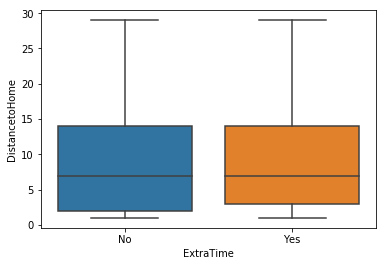

In [41]:
# first plot numeric data wrt to target to see if there is any dependence
import seaborn as sns

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.DistancetoHome)

# there is no impact

<IPython.core.display.Javascript object>


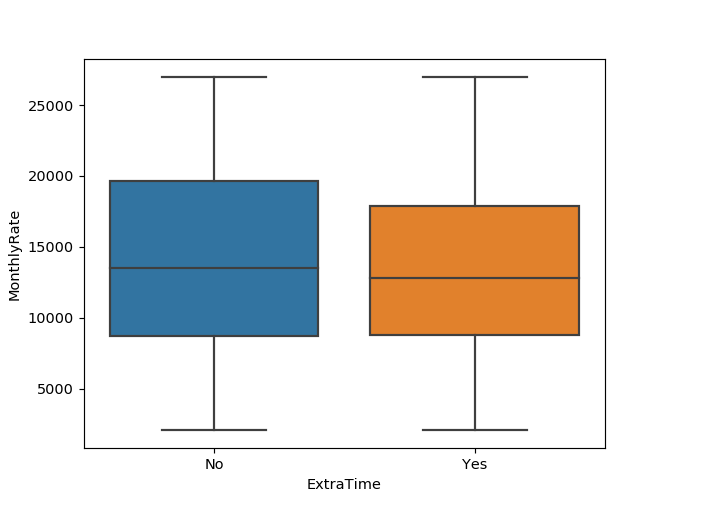

In [82]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyRate)

# there is not too much impact but mean value of Monthly rate is slightly less for Yes folks


<IPython.core.display.Javascript object>


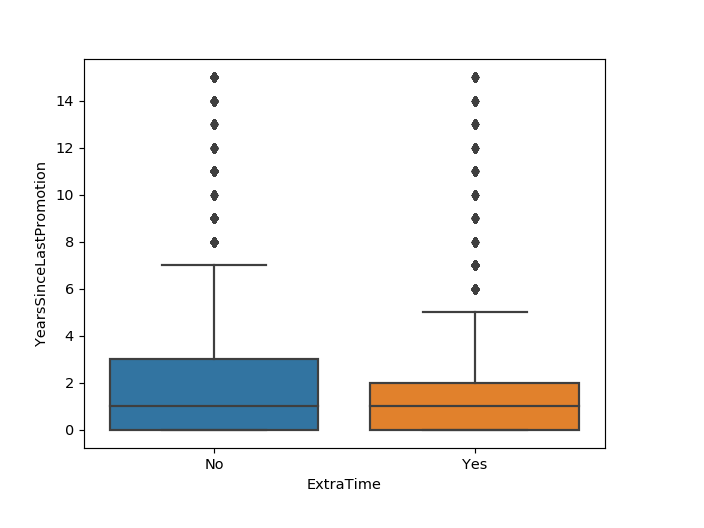

In [83]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.YearsSinceLastPromotion)

<IPython.core.display.Javascript object>


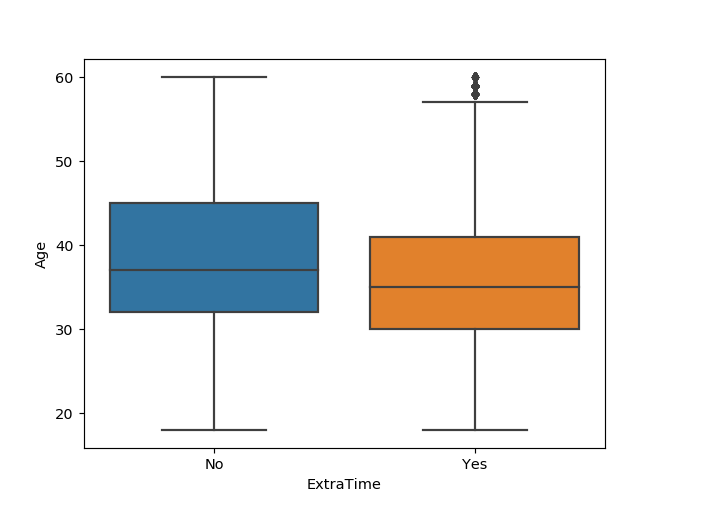

In [84]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.Age)

# as guessed lower age group seems to have higher proportion of Yes - extra time
# 

<IPython.core.display.Javascript object>


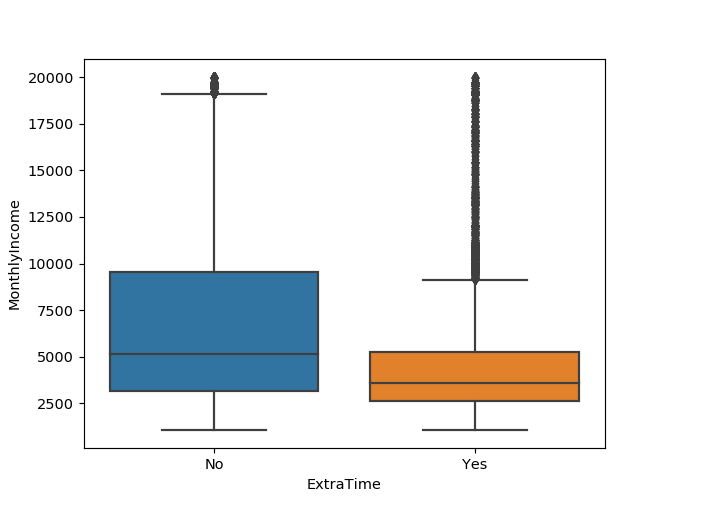

In [85]:

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyIncome)

# mean of Yes folks is lesser - makes sense

In [77]:
# since job level is correlated with MonthlyIncome let us check which is a better feature 

figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Joblevel)

# job level 1 seems have higher propensity for Extra time
# job all other levels seem to have lesser propensity for Extra time

# it is probably 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


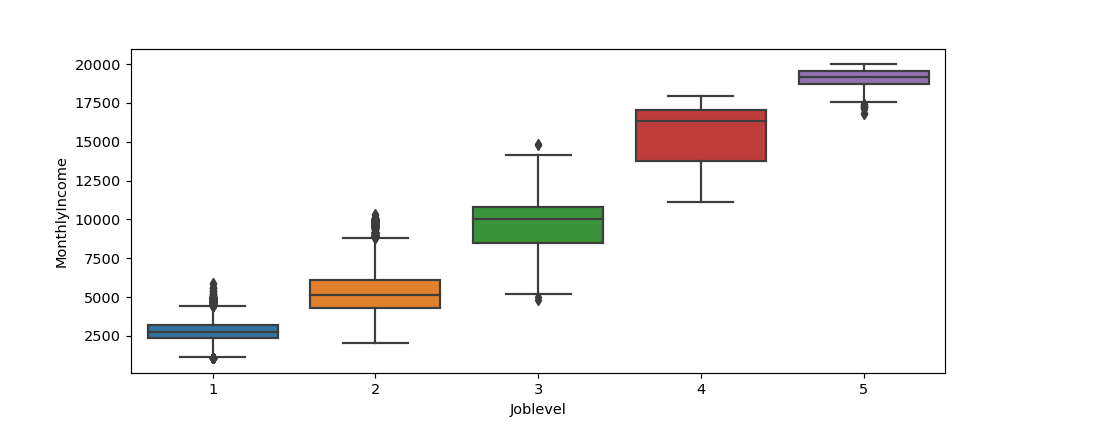

In [86]:
# check monthly income by job level

figs, axs = plt.subplots()
figs.set_size_inches(10,4)

sns.boxplot(x=train_x_initial.Joblevel, y=train_x_initial.MonthlyIncome)

In [79]:
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.barplot(x=train_x_initial.Joblevel, y=train_x_initial.MonthlyIncome, hue=train_x_initial.ExtraTime)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


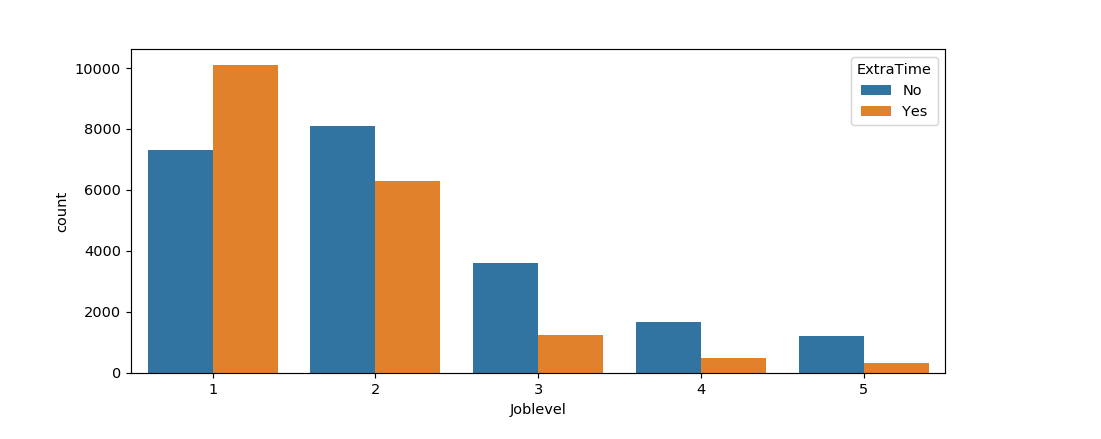

In [87]:
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.countplot(x=train_x_initial.Joblevel, hue=train_x_initial.ExtraTime)

# essentially Job level 1 has higher proportion of employees doing Extra time

# let us use JobLevel instead of MonthlyIncome
# Even though it may increase number features... since we have lot of data
# May be that is ok. 
# try one with Joblevel and the other with MonthlyIncome see which one gives better

In [81]:
# check with hourly rate


figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.Hourlyrate)

# there doesn't seem to be any difference... 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


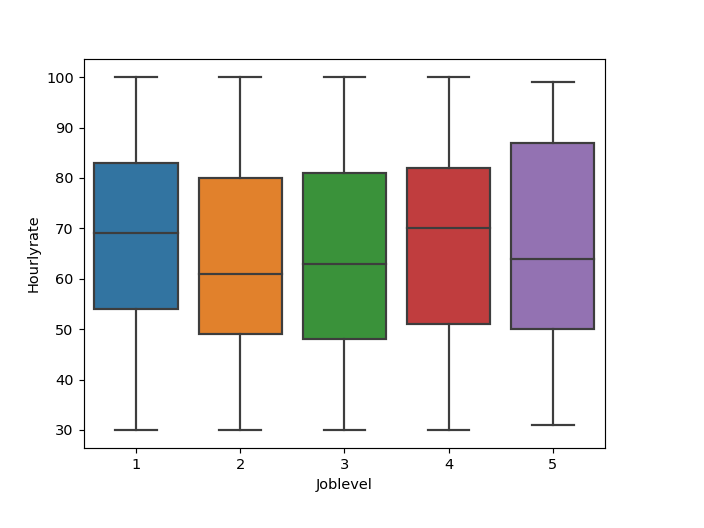

In [88]:

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.Joblevel, y=train_x_initial.Hourlyrate)

# not much difference in hourly rates across job levels! 
# Let us keep Hourly rate... 

In [83]:
# does marital status have any impact?

figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.countplot(x=train_x_initial.MaritalStatus, hue=train_x_initial.ExtraTime)

# as expected single people have higher propensity for extratime

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


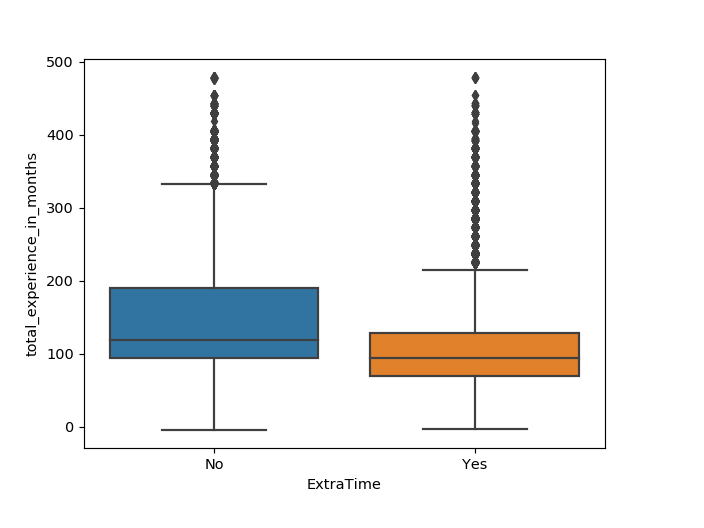

In [89]:
# are more experienced people staying late?


figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.total_experience_in_months)

# mean of Yes folks is slightly less



In [85]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyIncome)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


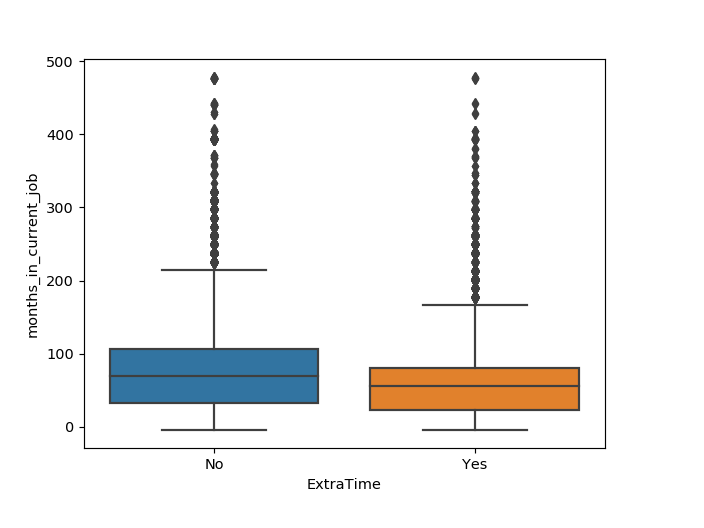

In [90]:
# what about experience in the company?

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.months_in_current_job)

In [87]:
# people with ESOP?
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.PerformanceRating)

# doesn't seem to have any impact

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


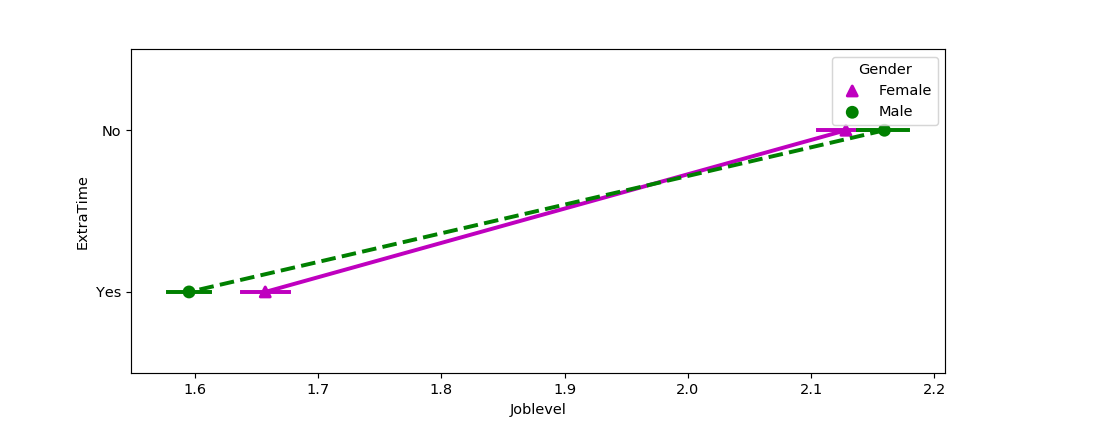

In [91]:
# joblevel Gender 
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.pointplot(x="Joblevel", y="ExtraTime", hue="Gender", data=train_x_initial,
              palette={"Male": "g", "Female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

In [89]:
func = lambda x: 100*x.count()/train_x_initial.shape[0]
# count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=['Joblevel'], values=['Gender'],
#                 aggfunc=len, margins=True, dropna=True, fill_value=0 )

# percent_table = count_table.div( count_table.iloc[:,-1], axis=0 )
# percent_table


count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Joblevel'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No    Yes
Joblevel              
1          7306  10106
2          8101   6293
3          3589   1252
4          1664    491
5          1192    309
ExtraTime        No       Yes
Joblevel                     
1          0.419596  0.580404
2          0.562804  0.437196
3          0.741376  0.258624
4          0.772158  0.227842
5          0.794137  0.205863


In [92]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Joblevel'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No    Yes
Joblevel              
1          7306  10106
2          8101   6293
3          3589   1252
4          1664    491
5          1192    309
ExtraTime        No       Yes
Joblevel                     
1          0.419596  0.580404
2          0.562804  0.437196
3          0.741376  0.258624
4          0.772158  0.227842
5          0.794137  0.205863


In [93]:
print(train_x_initial.ExtraTime.value_counts())
# yes to no ration
train_x_initial.loc[train_x_initial.ExtraTime == 'Yes','ExtraTime'].shape[0]/train_x_initial.shape[0]

# in the overall data No to Yes ration is 54.2% to 46% 

# so anything that has higher percentage is key influencer

# see which is increasing or decreasing the No %age Which combination



No     21852
Yes    18451
Name: ExtraTime, dtype: int64


0.45780711113316624

In [94]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Gender'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

# gender doesn't have any influence

ExtraTime     No   Yes
Gender                
Female      9616  8495
Male       12236  9956
ExtraTime        No       Yes
Gender                       
Female     0.530948  0.469052
Male       0.551370  0.448630


In [95]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'PerformanceRating'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")


ExtraTime             No    Yes
PerformanceRating              
3                  18129  15655
4                   3723   2796
ExtraTime                No       Yes
PerformanceRating                    
3                  0.536615  0.463385
4                  0.571100  0.428900


In [96]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Division'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime                  No    Yes
Division                            
Human Resources           771    532
Research & Development  15541  14418
Sales                    5540   3501
ExtraTime                     No       Yes
Division                                  
Human Resources         0.591711  0.408289
Research & Development  0.518742  0.481258
Sales                   0.612764  0.387236


In [97]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Education'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No   Yes
Education            
1          1867  1217
2          4998  5041
3          8602  8376
4          5618  3527
5           767   290
ExtraTime        No       Yes
Education                    
1          0.605383  0.394617
2          0.497858  0.502142
3          0.506656  0.493344
4          0.614325  0.385675
5          0.725639  0.274361


<IPython.core.display.Javascript object>


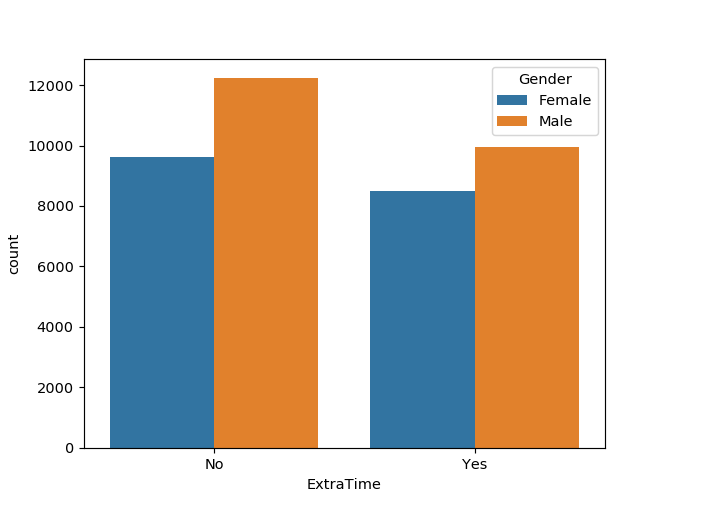

In [98]:
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Gender)
# there doesnt seem to be too much dependence on Gender for Extra time


In [97]:
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Division)
# 

<IPython.core.display.Javascript object>

In [99]:
# check levels in train set
train_x_initial[cat_var].apply(lambda x:print(x.value_counts(dropna=False)))

1    17412
2    14394
3     4841
4     2155
5     1501
Name: Joblevel, dtype: int64
Less        30254
High         7138
NoTravel     2911
Name: FrequencyofTravel, dtype: int64
Male      22192
Female    18111
Name: Gender, dtype: int64
3    14703
4    13635
2     6107
1     5858
Name: OfficeAmbienceRating, dtype: int64
3    20760
2    13612
4     4249
1     1682
Name: SelfMotivationRating, dtype: int64
Research & Development    29959
Sales                      9041
Human Resources            1303
Name: Division, dtype: int64
Laboratory Technician        13283
Research Scientist            7059
Sales Executive               6598
Manufacturing Director        3573
Healthcare Representative     2984
Manager                       2101
Research Director             1988
Sales Representative          1554
Human Resources               1163
Name: JobRole, dtype: int64
3    12692
2    11379
4     9034
1     7198
Name: RelationshipSatisfaction, dtype: int64
3    16978
2    10039
4     9145
1    

Joblevel                    None
FrequencyofTravel           None
Gender                      None
OfficeAmbienceRating        None
SelfMotivationRating        None
Division                    None
JobRole                     None
RelationshipSatisfaction    None
Education                   None
No.ofWorkshopsAttended      None
NumberofCompaniesChanged    None
WorkLifeBalance             None
Emolumnet_in_Pecentage      None
Happynesslevelinjob         None
ESOps                       None
Specialization              None
PerformanceRating           None
MaritalStatus               None
dtype: object

In [100]:
test_x[cat_var].apply(lambda x:print(x.value_counts(dropna=False)))

1    4363
2    3533
3    1234
4     572
5     336
Name: Joblevel, dtype: int64
Less        7562
High        1726
NoTravel     750
Name: FrequencyofTravel, dtype: int64
Male      5539
Female    4499
Name: Gender, dtype: int64
3    3674
4    3330
1    1523
2    1511
Name: OfficeAmbienceRating, dtype: int64
3    5209
2    3395
4    1040
1     394
Name: SelfMotivationRating, dtype: int64
Research & Development    7424
Sales                     2291
Human Resources            323
Name: Division, dtype: int64
Laboratory Technician        3275
Research Scientist           1763
Sales Executive              1679
Manufacturing Director        886
Healthcare Representative     738
Manager                       530
Research Director             475
Sales Representative          420
Human Resources               272
Name: JobRole, dtype: int64
3    3198
2    2899
4    2184
1    1757
Name: RelationshipSatisfaction, dtype: int64
3    4272
2    2467
4    2301
1     756
5     242
Name: Education, dtype

Joblevel                    None
FrequencyofTravel           None
Gender                      None
OfficeAmbienceRating        None
SelfMotivationRating        None
Division                    None
JobRole                     None
RelationshipSatisfaction    None
Education                   None
No.ofWorkshopsAttended      None
NumberofCompaniesChanged    None
WorkLifeBalance             None
Emolumnet_in_Pecentage      None
Happynesslevelinjob         None
ESOps                       None
Specialization              None
PerformanceRating           None
MaritalStatus               None
dtype: object

In [101]:
# No difference in levels between test and train sets

<IPython.core.display.Javascript object>


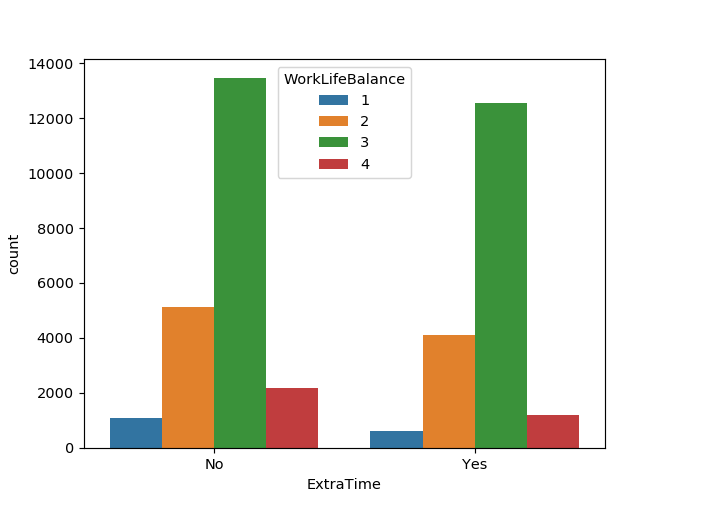

In [102]:
# does worklife balance have an impact?

figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.WorkLifeBalance)
# there 

In [104]:
cat_train = train_x[cat_var]
num_train = train_x[num_var]

cat_val = val_x[cat_var]
num_val = val_x[num_var]

cat_test = test_x[cat_var]
num_test = test_x[num_var]


In [105]:
cat_train[cat_train.columns] = cat_train[cat_train.columns].apply(lambda x:x.astype('category'))

cat_val[cat_val.columns] = cat_val[cat_val.columns].apply(lambda x:x.astype('category'))

cat_test[cat_test.columns] = cat_test[cat_test.columns].apply(lambda x:x.astype('category'))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [106]:
# we now have to use LabelEncoder on categoric variables which 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


cat_train = cat_train.apply(LabelEncoder().fit_transform)
cat_val = cat_val.apply(LabelEncoder().fit_transform)
cat_test = cat_test.apply(LabelEncoder().fit_transform)

In [108]:
print(train_y.value_counts())

No     16405
Yes    13822
Name: ExtraTime, dtype: int64


In [109]:
train_encoder = LabelEncoder()
train_y = train_encoder.fit_transform(train_y)

In [110]:
print(nparray_value_counts(train_y))

[[    0 16405]
 [    1 13822]]
None


In [111]:
print(val_y.value_counts())

No     5447
Yes    4629
Name: ExtraTime, dtype: int64


In [112]:
val_y = LabelEncoder().fit_transform(val_y)


In [113]:
nparray_value_counts(val_y)

[[   0 5447]
 [   1 4629]]


In [114]:
cat_train[cat_train.columns] = cat_train[cat_train.columns].apply(lambda x:x.astype('category'))

cat_val[cat_val.columns] = cat_val[cat_val.columns].apply(lambda x:x.astype('category'))

cat_test[cat_test.columns] = cat_test[cat_test.columns].apply(lambda x:x.astype('category'))

In [115]:
# For model training

# Set 1 - 
# without dummification just with Label encoding

train_x_le = pd.concat([num_train, cat_train], axis=1)

val_x_le = pd.concat([num_val, cat_val], axis=1)

test_x_le = pd.concat([num_test, cat_test], axis=1)



In [116]:
# check shape just to make sure
print(train_x_le.shape)
print(val_x_le.shape)
print(test_x_le.shape)

(30227, 28)
(10076, 28)
(10038, 28)


In [117]:
# check zero variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
print(train_x_le.shape)
print((selector.fit_transform(train_x_le)).shape)

# no zero variance data

(30227, 28)
(30227, 28)


In [118]:
# scale numeric data

# now scale the numeric data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# scaler = StandardScaler()
# scaler.fit(train_x_dum)

num_train_scl = pd.DataFrame(scale(num_train), columns=num_train.columns)

num_val_scl = pd.DataFrame(scale(num_val), columns=num_val.columns)

num_test_scl = pd.DataFrame(scale(num_test), columns=num_test.columns)





In [119]:
num_train_scl.describe()

,DistancetoHome,MonthlyRate,YearsSinceLastPromotion,Hourlyrate,Age,YearsInCurrentRole,DialyRate,MonthlyIncome,total_experience_in_months,months_in_current_job
count,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04
mean,6.171293e-17,-6.239977e-17,-7.750295e-16,-3.083590e-16,2.840045e-16,2.979461e-16,-1.271649e-16,-5.422011e-17,-1.567763e-16,-9.073292e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.077203e+00,-1.771567e+00,-6.338786e-01,-1.971750e+00,-2.247236e+00,-1.176923e+00,-1.694789e+00,-1.102133e+00,-1.709318e+00,-1.209396e+00
25%,-8.174571e-01,-7.609712e-01,-6.338786e-01,-8.260612e-01,-7.684632e-01,-5.548055e-01,-8.741101e-01,-6.987834e-01,-6.371097e-01,-6.463126e-01
50%,-2.979645e-01,-9.572820e-02,-2.774354e-01,-6.226891e-02,-1.997044e-01,-2.437468e-01,3.320964e-02,-3.612821e-01,-1.956123e-01,-2.396414e-01
75%,6.111476e-01,8.250608e-01,7.900782e-02,8.651931e-01,7.103097e-01,6.894292e-01,9.092424e-01,2.240107e-01,2.963419e-01,3.390829e-01
max,2.559245e+00,2.021065e+00,4.712770e+00,1.847212e+00,2.530338e+00,4.422133e+00,1.664941e+00,3.239955e+00,4.383346e+00,6.329662e+00


In [120]:
print(num_train_scl.shape)
print(num_val_scl.shape)
print(num_test_scl.shape)

(30227, 10)
(10076, 10)
(10038, 10)


In [121]:
# sometimes not reseting index is creating probplems
num_train_scl.reset_index(drop=True, inplace=True)

num_val_scl.reset_index(drop=True, inplace=True)

num_test_scl.reset_index(drop=True, inplace=True)

cat_train.reset_index(drop=True, inplace=True)
cat_val.reset_index(drop=True, inplace=True)
cat_test.reset_index(drop=True, inplace=True)

train_x_le_scl = pd.concat([num_train_scl, cat_train], axis=1)

val_x_le_scl = pd.concat([num_val_scl, cat_val], axis=1)

test_x_le_scl = pd.concat([num_test_scl, cat_test], axis=1)



In [122]:
# check shape just to make sure
print(train_x_le_scl.shape)
print(val_x_le_scl.shape)
print(test_x_le_scl.shape)

(30227, 28)
(10076, 28)
(10038, 28)


In [123]:
# now create dummies for cat variables
cat_train_dummies = pd.get_dummies(cat_train)

cat_val_dummies = pd.get_dummies(cat_val)

cat_test_dummies = pd.get_dummies(cat_test)

In [124]:
print(cat_train_dummies.shape)
print(cat_val_dummies.shape)
print(cat_test_dummies.shape)

print(cat_train.shape)
cat_train_dummies.head()

(30227, 94)
(10076, 94)
(10038, 94)
(30227, 18)


,Joblevel_0,Joblevel_1,Joblevel_2,Joblevel_3,Joblevel_4,FrequencyofTravel_0,FrequencyofTravel_1,FrequencyofTravel_2,Gender_0,Gender_1,...,Specialization_1,Specialization_2,Specialization_3,Specialization_4,Specialization_5,PerformanceRating_0,PerformanceRating_1,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,0,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [125]:
# sometimes not reseting index is creating probplems
num_train.reset_index(drop=True, inplace=True)

num_val.reset_index(drop=True, inplace=True)

num_test.reset_index(drop=True, inplace=True)

cat_train_dummies.reset_index(drop=True, inplace=True)
cat_val_dummies.reset_index(drop=True, inplace=True)
cat_test_dummies.reset_index(drop=True, inplace=True)

train_x_le_dum = pd.concat([num_train, cat_train_dummies], axis=1)

val_x_le_dum = pd.concat([num_val, cat_val_dummies], axis=1)

test_x_le_dum = pd.concat([num_test, cat_test_dummies], axis=1)

In [126]:
print(train_x_le_dum.shape)
print(val_x_le_dum.shape)
print(test_x_le_dum.shape)

(30227, 104)
(10076, 104)
(10038, 104)


In [127]:

train_x_le_dum_scl = pd.concat([num_train_scl, cat_train_dummies], axis=1)

val_x_le_dum_scl = pd.concat([num_val_scl, cat_val_dummies], axis=1)

test_x_le_dum_scl = pd.concat([num_test_scl, cat_test_dummies], axis=1)

In [128]:
print(train_x_le_dum_scl.shape)
print(val_x_le_dum_scl.shape)
print(test_x_le_dum_scl.shape)

(30227, 104)
(10076, 104)
(10038, 104)


In [129]:
# we now have several sets of data for modeling

# Set 1  just label encoded without dummification and scaling

# train_x_le
# val_x_le
# test_x_le

# Set 1 for RF and trees


# Set 2 dummified without scaling

# train_x_le_dum
# val_x_le_dum
# test_x_le_dum

# Set 2 for GBM and Adaboos

# set 3 dummified and scaled

# train_x_le_dum_scl
# val_x_le_dum_scl
# test_x_le_dum_scl

# Set 3 for SVM


In [130]:
# creating a function to plot ROC curves
def plot_roc_curve(estimator, val_x, val_y):
    from sklearn.metrics import roc_curve, auc


    # shuffle and split training and test sets


    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(val_y, estimator.predict_proba(val_x)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    text =  ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label=text)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    

from sklearn.metrics import accuracy_score, auc, cohen_kappa_score, f1_score, recall_score

def append_classification_metrics_df(mdata, mname, mtype, actual, pred ):
    mdata = mdata.append({'Model name':mname, 'Metric Type': mtype, 
                                    'Kappa':cohen_kappa_score(actual, pred),
                                    'Accuracy':accuracy_score(actual, pred), 
                                    'Recall':recall_score(actual, pred), 
                                    'F1 Score':f1_score(actual, pred)},
                    ignore_index=True)
    return mdata

In [131]:
# initialize the metrics DF
metrics_data = pd.DataFrame(columns=['Model name', 'Metric Type', 'Kappa', 'Accuracy', 'Recall', 'F1 Score'])

In [132]:
# let us do basic Random Forest 
grid_test_rf_simple = { "n_estimators"      : [1000],
               "criterion"         : [ "entropy"],
               "max_features"      : ['sqrt'],
               "max_depth"         : [None],
               "min_samples_split" : [20] }

In [133]:
# Let us do basic Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(oob_score=True)

grid_search_1 = GridSearchCV(forest, grid_test_rf_simple, n_jobs=-1, cv=3)

In [134]:
# simple random forest 
# use data without dummification and scaling
grid_search_1.fit(train_x_le, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000], 'criterion': ['entropy'], 'max_features': ['sqrt'], 'max_depth': [None], 'min_samples_split': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [135]:
pred_train_rf1 = grid_search_1.best_estimator_.predict(train_x_le)
pred_val_rf1 = grid_search_1.best_estimator_.predict(val_x_le)



In [136]:
nparray_value_counts(pred_train_rf1)
nparray_value_counts(train_y)


[[    0 16943]
 [    1 13284]]
[[    0 16405]
 [    1 13822]]


In [137]:
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - simple",
                                               'train',
                                               train_y,
                                               pred_train_rf1)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - simple",
                                               'val',
                                               val_y,
                                               pred_val_rf1)

metrics_data.tail(10)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.669991,0.836702,0.801982,0.817900
1,RF - simple,val,0.523936,0.762505,0.770577,0.748819


<IPython.core.display.Javascript object>


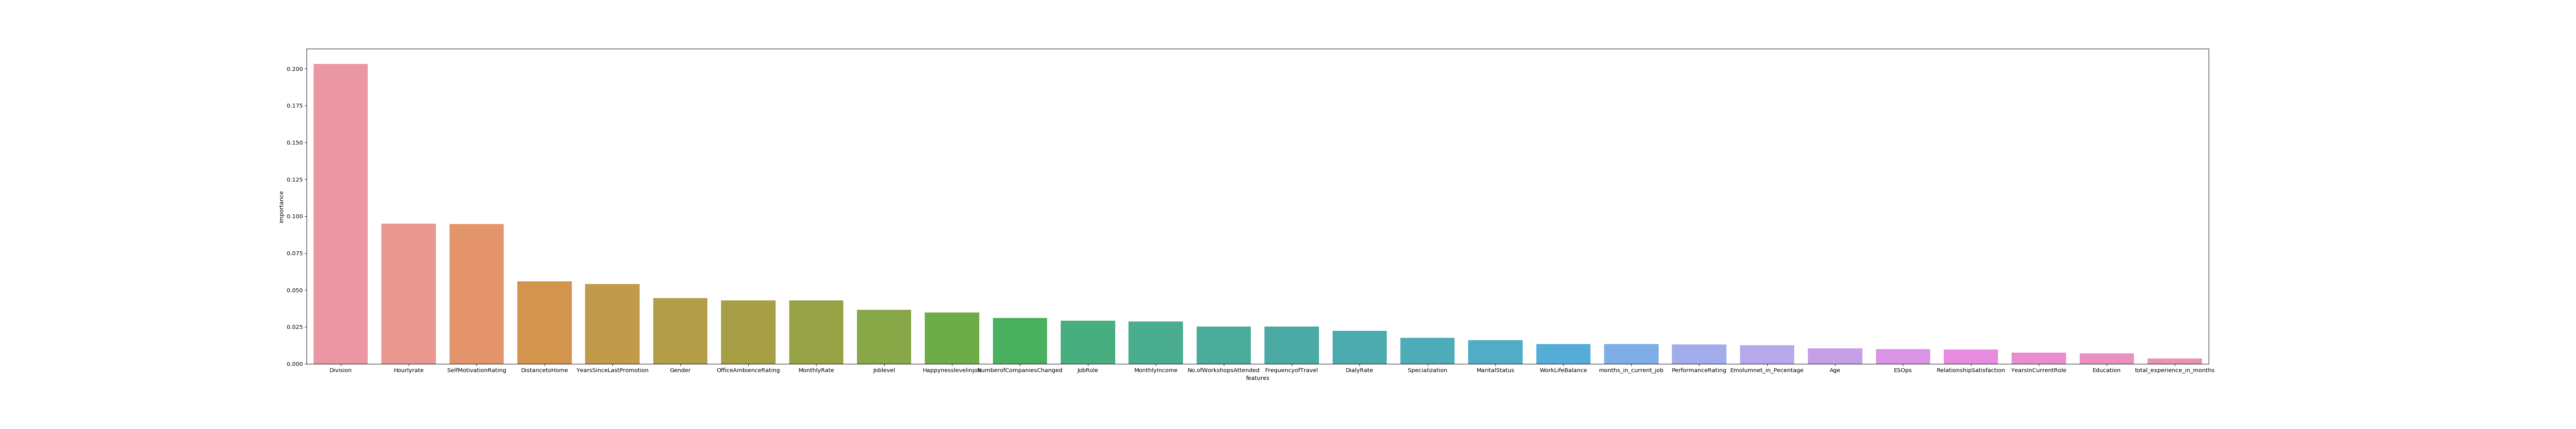

In [138]:
# check feature importance
# check feature importance
col_names = train_x.columns
feat_import = grid_search_1.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame(data={'features':col_names, 'importance':feat_import})

feature_importance_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importance_df.head(20)


import seaborn as sns
figs, axs = plt.subplots()
figs.set_size_inches(w=60,h=10)
sns.barplot(x=feature_importance_df.features, y=feature_importance_df.importance)
plt.show()


[0.2033770983862409, 0.29838160623558946, 0.3930343085622009, 0.44892357610708655, 0.5030084662901357, 0.5474490147702881, 0.5904311135369199, 0.6333142963712781, 0.6697734701955694, 0.7044192391284346, 0.7353518543919869, 0.7646433045184233, 0.7932561976701521, 0.8185941913468605, 0.8437406509454887, 0.8661544849630561, 0.8837248731166284, 0.8997302437383397, 0.9131607251879154, 0.9265396427757826, 0.9395343837626753, 0.9521989306471648, 0.9625251132661755, 0.9723772715284298, 0.9820398512080363, 0.9894952258542402, 0.9965234100839955, 1.0]


<IPython.core.display.Javascript object>


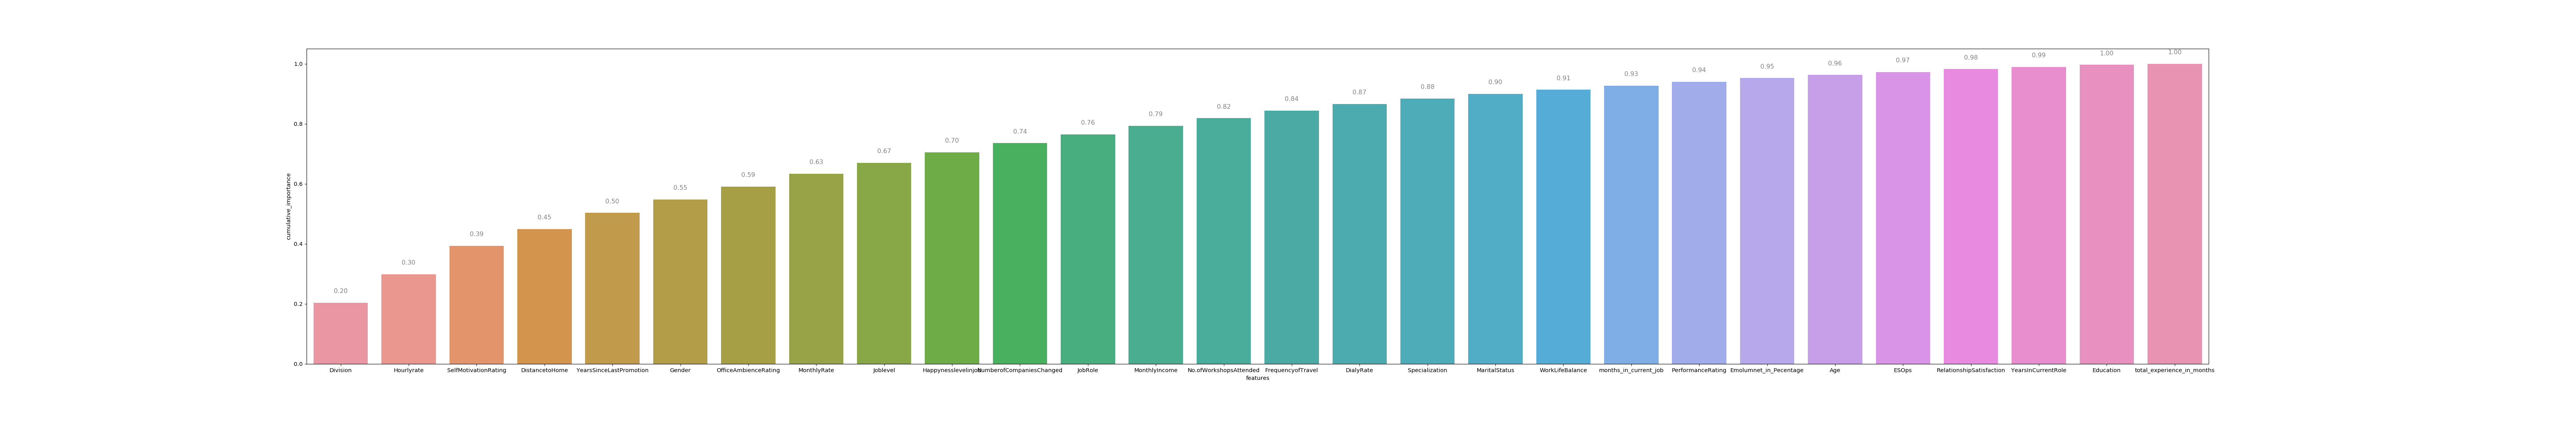

In [139]:
#feature_importance_df['cumulative_importance'] = feature_importance_df.importan
feature_importance_df.importance.count()
cum_importance = 0
list1 = []
for imp in feature_importance_df.importance:
    cum_importance = cum_importance + imp
    list1.append(cum_importance ) 
print(list1)

feature_importance_df['cumulative_importance']= list1

figs, axs = plt.subplots()
figs.set_size_inches(w=60, h=10)
g = sns.barplot(x=feature_importance_df.features, y=feature_importance_df['cumulative_importance'])


ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [140]:
pred_test_rf1 = grid_search_1.best_estimator_.predict(test_x_le)

In [141]:
nparray_value_counts(pred_test_rf1)

[[   0 5154]
 [   1 4884]]


In [142]:
submittion_df1 = submittion_df.copy(deep=True)

In [143]:
print(submittion_df1.shape)
submittion_df1.ExtraTime = pred_test_rf1

(10038, 2)


In [144]:
submittion_df1.ExtraTime.value_counts()

0    5154
1    4884
Name: ExtraTime, dtype: int64

In [145]:
submittion_df1.ExtraTime = submittion_df1.ExtraTime.map({1:'Yes', 0:"No"})

In [146]:
submittion_df1.ExtraTime.value_counts()

No     5154
Yes    4884
Name: ExtraTime, dtype: int64

In [147]:
submittion_df1.to_csv('submittion_rf_1.csv', index=False)

<IPython.core.display.Javascript object>


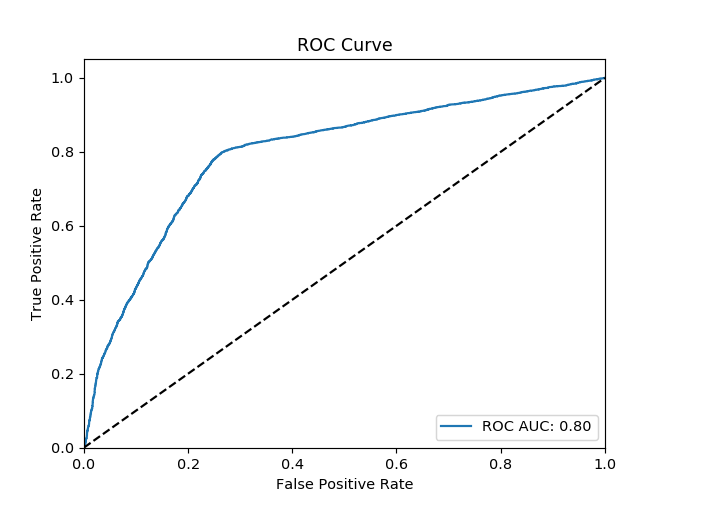

In [148]:
plot_roc_curve(grid_search_1.best_estimator_, val_x_le, val_y)

In [149]:
# grid search RF best parameters are: 
#{'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_split': 40, 'n_estimators': 1500}

# now do fit on full data and try

rf_final = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=6,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final.fit(train_x_le, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [150]:
pred_train_rf2 = rf_final.predict(train_x_le)
pred_val_rf2 = rf_final.predict(val_x_le)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - Final with tuned parameters",
                                               'train',
                                               train_y,
                                               pred_train_rf2)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - Final with tuned parameters",
                                               'val',
                                               val_y,
                                               pred_val_rf2)

print(metrics_data.tail(20))



pred_test_rf2 = rf_final.predict(test_x_le)

submittion_rf2 = submittion_df.copy(deep=True)

submittion_rf2.ExtraTime = pred_test_rf2

submittion_rf2.ExtraTime = submittion_rf2.ExtraTime.map({1:'Yes', 0:"No"})

submittion_rf2.to_csv('submittion_rf_with_tuned_params.csv', index=False)

                         Model name Metric Type     Kappa  Accuracy    Recall  \
0                       RF - simple       train  0.669991  0.836702  0.801982   
1                       RF - simple         val  0.523936  0.762505  0.770577   
2  RF - Final with tuned parameters       train  0.585982  0.793661  0.800391   
3  RF - Final with tuned parameters         val  0.527608  0.764291  0.773817   

   F1 Score  
0  0.817900  
1  0.748819  
2  0.780101  
3  0.751022  


<IPython.core.display.Javascript object>


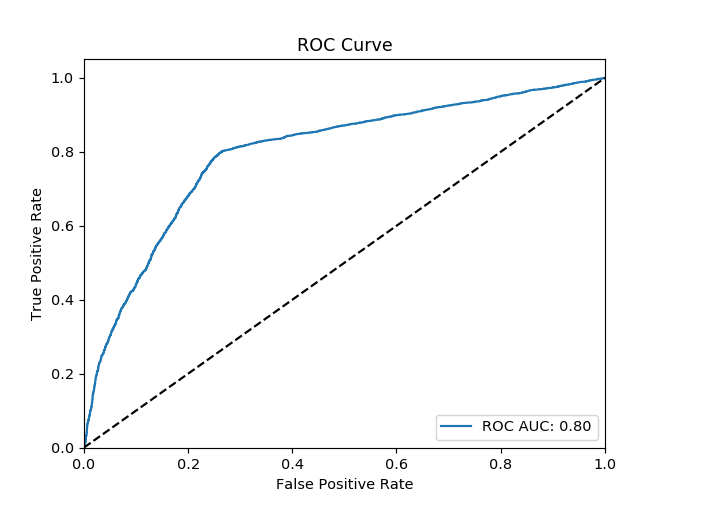

In [151]:
plot_roc_curve(rf_final, val_x_le, val_y)

In [152]:
col_names = train_x_le.columns
feat_import1 = rf_final.feature_importances_

feature_importance_df1 = pd.DataFrame(data={'features':col_names, 'importance':feat_import1})

feature_importance_df1.sort_values(by=['importance'], ascending=False, inplace=True)
print(feature_importance_df1)

                      features  importance
8   total_experience_in_months    0.236688
7                MonthlyIncome    0.099504
9        months_in_current_job    0.075381
1                  MonthlyRate    0.047028
6                    DialyRate    0.046162
5           YearsInCurrentRole    0.045692
20    NumberofCompaniesChanged    0.039901
4                          Age    0.039790
3                   Hourlyrate    0.039431
10                    Joblevel    0.034486
0               DistancetoHome    0.034288
16                     JobRole    0.031977
13        OfficeAmbienceRating    0.030330
22      Emolumnet_in_Pecentage    0.026850
19      No.ofWorkshopsAttended    0.025996
2      YearsSinceLastPromotion    0.025443
23         Happynesslevelinjob    0.018220
25              Specialization    0.013260
24                       ESOps    0.012630
17    RelationshipSatisfaction    0.012089
18                   Education    0.011500
27               MaritalStatus    0.011466
14        S

<IPython.core.display.Javascript object>


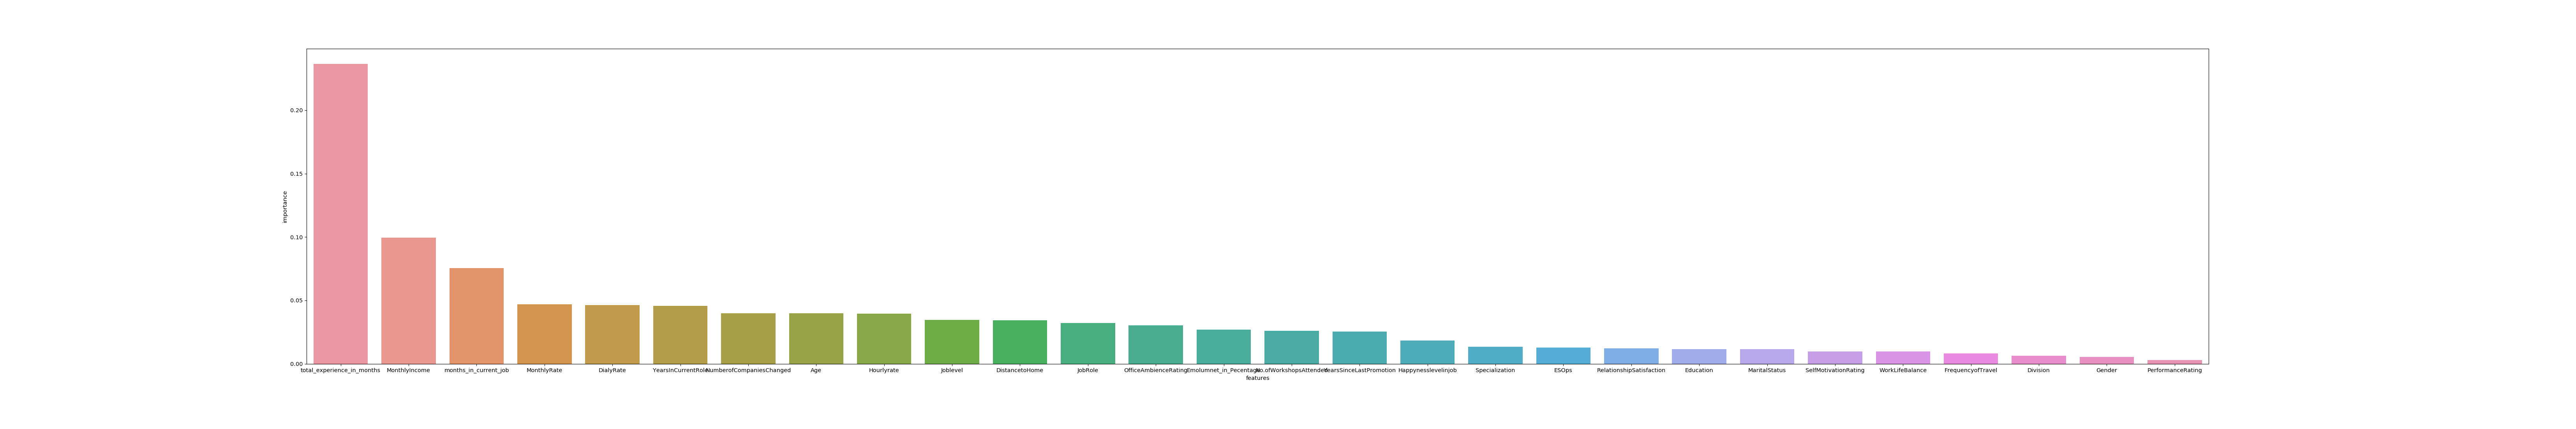

In [153]:
import seaborn as sns
figs, axs = plt.subplots()
figs.set_size_inches(w=60,h=10)
sns.barplot(x=feature_importance_df1.features, y=feature_importance_df1.importance)
plt.show()

[0.23668833130127231, 0.3361925194370006, 0.4115739499347315, 0.4586015211789266, 0.5047636598563972, 0.5504560811794703, 0.5903575124041296, 0.6301474165469518, 0.6695783748885977, 0.7040643217508851, 0.7383518592735179, 0.7703285214287733, 0.8006582771618629, 0.8275087041877247, 0.8535044858120221, 0.878947159684194, 0.8971672454474782, 0.9104268041208597, 0.9230564286183685, 0.935145872527368, 0.9466458325032248, 0.9581122033586214, 0.9677761225984294, 0.9773625845680807, 0.9853819933860908, 0.9916731976105981, 0.996939009527943, 1.0000000000000002]


<IPython.core.display.Javascript object>


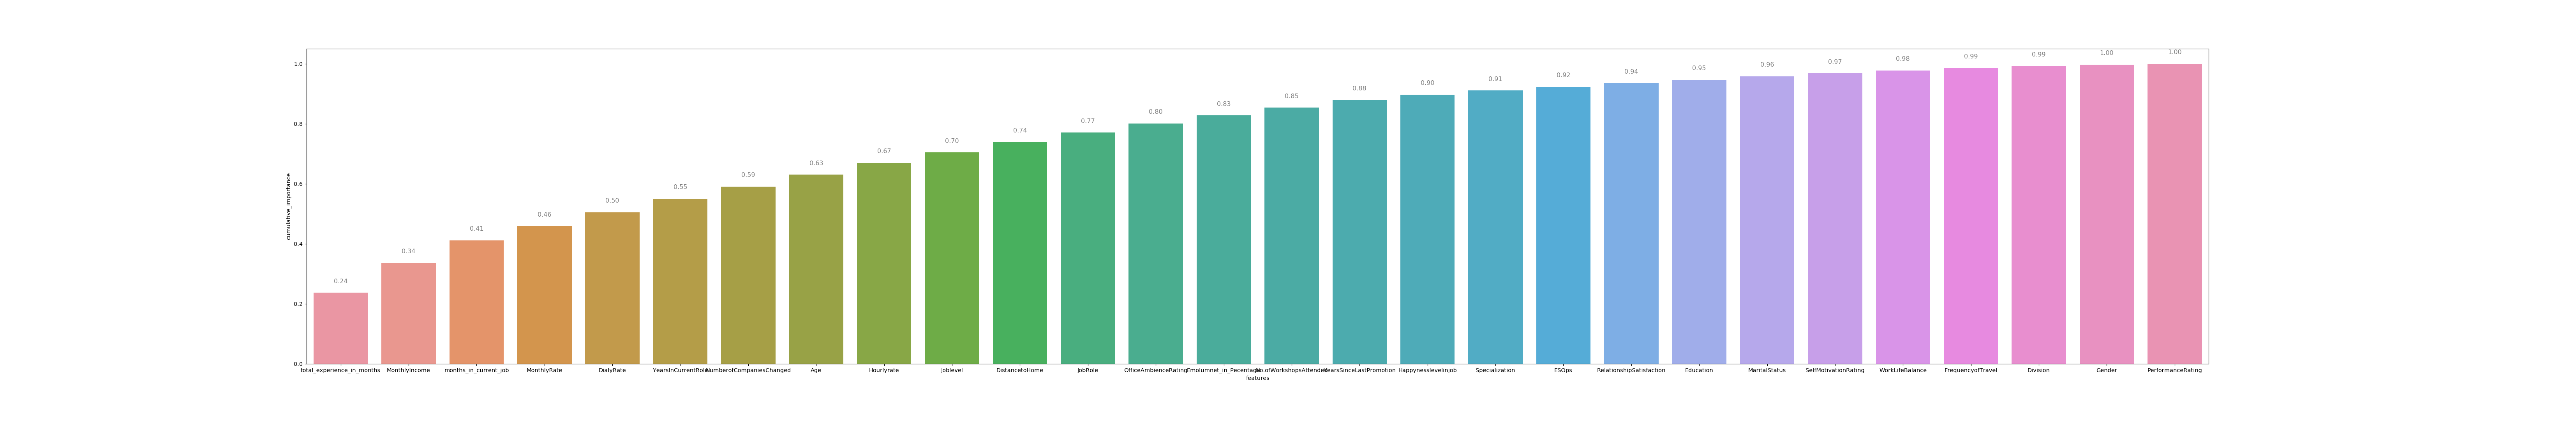

In [154]:
#feature_importance_df['cumulative_importance'] = feature_importance_df.importan
feature_importance_df1.importance.count()
cum_importance = 0
list1 = []
for imp in feature_importance_df1.importance:
    cum_importance = cum_importance + imp
    list1.append(cum_importance ) 
print(list1)

feature_importance_df1['cumulative_importance']= list1

figs, axs = plt.subplots()
figs.set_size_inches(w=60, h=10)
g = sns.barplot(x=feature_importance_df1.features, y=feature_importance_df1['cumulative_importance'])


ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [155]:
# 
# proper hyper parameter tuning for RF
grid_test_rf_full = { "n_estimators"      : [1500,2000],
               "criterion"         : ["entropy"],
               "max_features"      : [3,6,8],
               "max_depth"         : [3,7,11],
               "min_samples_split" : [40,60,200] }
sqrtfeat = np.sqrt((train_x_le.shape)[1])
grid_test_large = { "n_estimators"      : np.rint(np.linspace(train_x_le.shape[0]*2, train_x_le.shape[0]*3, 5)).astype(int),
                "criterion"         : ["gini", "entropy"],
                "max_features"      : np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                "max_depth"         : np.rint(np.linspace(1, train_x_le.shape[1]/2, 10)).astype(int),
                "min_samples_split" : np.rint(np.linspace(2, train_x_le.shape[0]/50, 10)).astype(int) }
grid_test_large

# use grid_test_large and prepare a grid_test_full ---- by modifying the parameters accordingly

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 1,  2,  4,  5,  7,  8, 10, 11, 13, 14]),
 'max_features': array([ 3,  5,  7,  9, 11]),
 'min_samples_split': array([  2,  69, 136, 203, 270, 337, 404, 471, 538, 605]),
 'n_estimators': array([60454, 68011, 75568, 83124, 90681])}

In [156]:
# Try tuning the parameters
# did the tuning on a different machine, hence commented out the fit method below
# to save time
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(oob_score=True)

grid_search_2 = GridSearchCV(forest, grid_test_rf_full, n_jobs=-1, cv=3)
#grid_search_2.fit(train_x_le, train_y)

# GridSearchCV(cv=3, error_score='raise',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=True, random_state=None, verbose=0, warm_start=False),
#        fit_params=None, iid=True, n_jobs=-1,
#        param_grid={'n_estimators': [1500], 'criterion': ['entropy'], 'max_features': [6], 'max_depth': [11, 13, 20, 25], 'min_samples_split': [10, 20, 40]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)

# 0.758725642637
# {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_split': 40, 'n_estimators': 1500}

In [157]:
# do XGB

# let us try XGB
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate

# params
# param = {
#     'n_estimators':[int(x) for x in np.linspace(200, 600, num = 8)] ,
#  'max_depth':[5,10,15,20,25],
#  'min_child_weight':[1,2,3,4],
#  'colsample_bytree':[0.8],
# # 'colsample_bylevel':[0.2,0.6,0.8],
# 'learning_rate':[0.1,0.2,0.3],
#     'subsample':[0.5],
#     'scale_pos_weight':[0.5, 1.5, 2],
#     'gamma':[0,0.1,0.2,0.3]
# }

xgb_grid = {
    'n_estimators':[1500] ,
 'max_depth':[8],
 'min_child_weight':[2],
 'colsample_bytree':[0.8],
# 'colsample_bylevel':[0.2,0.6,0.8],
'learning_rate':[0.01],
    'subsample':[0.5],
    'gamma':[0]
}
print(xgb_grid)



{'n_estimators': [1500], 'max_depth': [8], 'min_child_weight': [2], 'colsample_bytree': [0.8], 'learning_rate': [0.01], 'subsample': [0.5], 'gamma': [0]}


In [158]:
# without balancing
xgbsearch = GridSearchCV(estimator = XGBClassifier( 
        objective= 'binary:logistic', 
        seed=1), 
    param_grid = xgb_grid, 
    scoring='accuracy',
    cv=3,
    verbose = 1)


In [159]:
xgbsearch.fit(train_x_le_dum,train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1500], 'max_depth': [8], 'min_child_weight': [2], 'colsample_bytree': [0.8], 'learning_rate': [0.01], 'subsample': [0.5], 'gamma': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [160]:
pred_train_xgb1 = xgbsearch.best_estimator_.predict(train_x_le_dum)
pred_val_xgb1 = xgbsearch.best_estimator_.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "XGB - simple",
                                               'train',
                                               train_y,
                                               pred_train_xgb1)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "XGB - simple",
                                               'val',
                                               val_y,
                                               pred_val_xgb1)

print(metrics_data.tail(10))



pred_test_xgb1 = xgbsearch.best_estimator_.predict(test_x_le_dum)

submittion_xgb1 = submittion_df.copy(deep=True)

submittion_xgb1.ExtraTime = pred_test_xgb1

submittion_xgb1.ExtraTime = submittion_xgb1.ExtraTime.map({1:'Yes', 0:"No"})

submittion_xgb1.to_csv('submittion_xgb_1.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


                         Model name Metric Type     Kappa  Accuracy    Recall  \
0                       RF - simple       train  0.669991  0.836702  0.801982   
1                       RF - simple         val  0.523936  0.762505  0.770577   
2  RF - Final with tuned parameters       train  0.585982  0.793661  0.800391   
3  RF - Final with tuned parameters         val  0.527608  0.764291  0.773817   
4                      XGB - simple       train  0.602973  0.802594  0.795182   
5                      XGB - simple         val  0.518591  0.760222  0.757399   

   F1 Score  
0  0.817900  
1  0.748819  
2  0.780101  
3  0.751022  
4  0.786504  
5  0.743742  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [161]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
train_y_keras = to_categorical(train_y)
val_y_keras = to_categorical(val_y)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [162]:
print(train_y.shape)
print(val_y.shape)
print(train_y_keras.shape)
print(val_y_keras.shape)
print(train_x_le_dum_scl.shape)
print(val_x_le_dum_scl.shape)
print(test_x_le_dum_scl.shape)

(30227,)
(10076,)
(30227, 2)
(10076, 2)
(30227, 104)
(10076, 104)
(10038, 104)


In [163]:
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.
from keras.models import Sequential 
from keras.layers import Dense

In [164]:
# Building a simple MLP

model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(12, kernel_initializer='uniform', input_dim = 104, activation='relu')) # Add a dense layer 
model.add(Dense(2, kernel_initializer='uniform', activation='softmax')) # Add output layer

In [165]:
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [166]:
nb_epochs = 500
# training the MLP model
#  
history = model.fit(train_x_le_dum_scl, train_y_keras, epochs=nb_epochs, batch_size=100, validation_split=0.1) 

Train on 27204 samples, validate on 3023 samples
Epoch 1/500
27204/27204 [==============================] - 2s 77us/step - loss: 0.6353 - acc: 0.6456 - val_loss: 0.6069 - val_acc: 0.6838
Epoch 2/500
27204/27204 [==============================] - 1s 22us/step - loss: 0.6075 - acc: 0.6807 - val_loss: 0.5973 - val_acc: 0.6884
Epoch 3/500
27204/27204 [==============================] - 1s 21us/step - loss: 0.5982 - acc: 0.6902 - val_loss: 0.5883 - val_acc: 0.7046
Epoch 4/500
27204/27204 [==============================] - 1s 21us/step - loss: 0.5911 - acc: 0.7008 - val_loss: 0.5841 - val_acc: 0.7099
Epoch 5/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5867 - acc: 0.7075 - val_loss: 0.5812 - val_acc: 0.7165
Epoch 6/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5835 - acc: 0.7129 - val_loss: 0.5798 - val_acc: 0.7205
Epoch 7/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5812 - acc: 0.7161 - val_loss: 0.5776 - v

27204/27204 [==============================] - 1s 21us/step - loss: 0.5496 - acc: 0.7448 - val_loss: 0.5549 - val_acc: 0.7569
Epoch 60/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5487 - acc: 0.7457 - val_loss: 0.5563 - val_acc: 0.7526
Epoch 61/500
27204/27204 [==============================] - 1s 23us/step - loss: 0.5488 - acc: 0.7454 - val_loss: 0.5534 - val_acc: 0.7526
Epoch 62/500
27204/27204 [==============================] - 1s 24us/step - loss: 0.5487 - acc: 0.7460 - val_loss: 0.5541 - val_acc: 0.7519
Epoch 63/500
27204/27204 [==============================] - 1s 19us/step - loss: 0.5485 - acc: 0.7457 - val_loss: 0.5538 - val_acc: 0.7502
Epoch 64/500
27204/27204 [==============================] - 1s 24us/step - loss: 0.5475 - acc: 0.7446 - val_loss: 0.5572 - val_acc: 0.7443
Epoch 65/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5482 - acc: 0.7446 - val_loss: 0.5555 - val_acc: 0.7582
Epoch 66/500
27204/27204 [==============

Epoch 118/500
27204/27204 [==============================] - 1s 19us/step - loss: 0.5412 - acc: 0.7503 - val_loss: 0.5514 - val_acc: 0.7539
Epoch 119/500
27204/27204 [==============================] - 1s 19us/step - loss: 0.5414 - acc: 0.7503 - val_loss: 0.5529 - val_acc: 0.7582
Epoch 120/500
27204/27204 [==============================] - 1s 22us/step - loss: 0.5412 - acc: 0.7509 - val_loss: 0.5504 - val_acc: 0.7605
Epoch 121/500
27204/27204 [==============================] - 1s 21us/step - loss: 0.5412 - acc: 0.7511 - val_loss: 0.5516 - val_acc: 0.7579
Epoch 122/500
27204/27204 [==============================] - 1s 20us/step - loss: 0.5405 - acc: 0.7508 - val_loss: 0.5525 - val_acc: 0.7522
Epoch 123/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5404 - acc: 0.7527 - val_loss: 0.5505 - val_acc: 0.7559
Epoch 124/500
27204/27204 [==============================] - 0s 18us/step - loss: 0.5404 - acc: 0.7522 - val_loss: 0.5500 - val_acc: 0.7575
Epoch 125/500
27204/

27204/27204 [==============================] - 0s 16us/step - loss: 0.5369 - acc: 0.7540 - val_loss: 0.5545 - val_acc: 0.7536
Epoch 177/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5368 - acc: 0.7543 - val_loss: 0.5545 - val_acc: 0.7582
Epoch 178/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5367 - acc: 0.7545 - val_loss: 0.5526 - val_acc: 0.7612
Epoch 179/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5369 - acc: 0.7546 - val_loss: 0.5532 - val_acc: 0.7612
Epoch 180/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5367 - acc: 0.7553 - val_loss: 0.5572 - val_acc: 0.7512
Epoch 181/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5373 - acc: 0.7538 - val_loss: 0.5551 - val_acc: 0.7522
Epoch 182/500
27204/27204 [==============================] - 1s 26us/step - loss: 0.5369 - acc: 0.7533 - val_loss: 0.5524 - val_acc: 0.7569
Epoch 183/500
27204/27204 [=======

27204/27204 [==============================] - 1s 24us/step - loss: 0.5350 - acc: 0.7559 - val_loss: 0.5534 - val_acc: 0.7588
Epoch 235/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5345 - acc: 0.7568 - val_loss: 0.5547 - val_acc: 0.7579
Epoch 236/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5343 - acc: 0.7568 - val_loss: 0.5527 - val_acc: 0.7572
Epoch 237/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5342 - acc: 0.7559 - val_loss: 0.5539 - val_acc: 0.7612
Epoch 238/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5344 - acc: 0.7567 - val_loss: 0.5554 - val_acc: 0.7539
Epoch 239/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5347 - acc: 0.7552 - val_loss: 0.5529 - val_acc: 0.7592
Epoch 240/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5345 - acc: 0.7557 - val_loss: 0.5523 - val_acc: 0.7575
Epoch 241/500
27204/27204 [=======

27204/27204 [==============================] - 0s 17us/step - loss: 0.5328 - acc: 0.7576 - val_loss: 0.5562 - val_acc: 0.7569
Epoch 293/500
27204/27204 [==============================] - 0s 18us/step - loss: 0.5326 - acc: 0.7564 - val_loss: 0.5528 - val_acc: 0.7549
Epoch 294/500
27204/27204 [==============================] - 1s 23us/step - loss: 0.5327 - acc: 0.7571 - val_loss: 0.5552 - val_acc: 0.7582
Epoch 295/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5327 - acc: 0.7561 - val_loss: 0.5543 - val_acc: 0.7592
Epoch 296/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5324 - acc: 0.7568 - val_loss: 0.5563 - val_acc: 0.7562
Epoch 297/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5325 - acc: 0.7564 - val_loss: 0.5564 - val_acc: 0.7588
Epoch 298/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5331 - acc: 0.7580 - val_loss: 0.5549 - val_acc: 0.7532
Epoch 299/500
27204/27204 [=======

27204/27204 [==============================] - 0s 15us/step - loss: 0.5320 - acc: 0.7581 - val_loss: 0.5572 - val_acc: 0.7545
Epoch 351/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5316 - acc: 0.7567 - val_loss: 0.5568 - val_acc: 0.7565
Epoch 352/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5313 - acc: 0.7575 - val_loss: 0.5547 - val_acc: 0.7565
Epoch 353/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5309 - acc: 0.7582 - val_loss: 0.5563 - val_acc: 0.7579
Epoch 354/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5316 - acc: 0.7575 - val_loss: 0.5559 - val_acc: 0.7565
Epoch 355/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5314 - acc: 0.7582 - val_loss: 0.5564 - val_acc: 0.7559
Epoch 356/500
27204/27204 [==============================] - 0s 18us/step - loss: 0.5313 - acc: 0.7575 - val_loss: 0.5577 - val_acc: 0.7555
Epoch 357/500
27204/27204 [=======

27204/27204 [==============================] - 1s 25us/step - loss: 0.5304 - acc: 0.7570 - val_loss: 0.5570 - val_acc: 0.7539
Epoch 409/500
27204/27204 [==============================] - 1s 31us/step - loss: 0.5301 - acc: 0.7586 - val_loss: 0.5558 - val_acc: 0.7565
Epoch 410/500
27204/27204 [==============================] - 1s 25us/step - loss: 0.5304 - acc: 0.7577 - val_loss: 0.5561 - val_acc: 0.7539
Epoch 411/500
27204/27204 [==============================] - 1s 30us/step - loss: 0.5303 - acc: 0.7576 - val_loss: 0.5590 - val_acc: 0.7526
Epoch 412/500
27204/27204 [==============================] - 1s 30us/step - loss: 0.5301 - acc: 0.7590 - val_loss: 0.5584 - val_acc: 0.7542
Epoch 413/500
27204/27204 [==============================] - 1s 26us/step - loss: 0.5305 - acc: 0.7576 - val_loss: 0.5599 - val_acc: 0.7572
Epoch 414/500
27204/27204 [==============================] - 1s 27us/step - loss: 0.5304 - acc: 0.7580 - val_loss: 0.5592 - val_acc: 0.7569
Epoch 415/500
27204/27204 [=======

27204/27204 [==============================] - 0s 15us/step - loss: 0.5291 - acc: 0.7586 - val_loss: 0.5593 - val_acc: 0.7549
Epoch 467/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5284 - acc: 0.7587 - val_loss: 0.5617 - val_acc: 0.7489
Epoch 468/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5292 - acc: 0.7582 - val_loss: 0.5567 - val_acc: 0.7565
Epoch 469/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5291 - acc: 0.7583 - val_loss: 0.5593 - val_acc: 0.7545
Epoch 470/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5292 - acc: 0.7592 - val_loss: 0.5584 - val_acc: 0.7496
Epoch 471/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5286 - acc: 0.7590 - val_loss: 0.5600 - val_acc: 0.7536
Epoch 472/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5290 - acc: 0.7595 - val_loss: 0.5582 - val_acc: 0.7499
Epoch 473/500
27204/27204 [=======

In [167]:
# Evaluate the model
score = model.evaluate(val_x_le_dum_scl, val_y_keras, verbose=0)
print('accuracy: ',score[1])

accuracy:  0.7454346962843967


In [168]:
pred_val_tf = model.predict_classes(val_x_le_dum_scl)
pred_train_tf = model.predict_classes(train_x_le_dum_scl)


metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Keras-TF1",
                                               'train',
                                               train_y,
                                               pred_train_tf)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Keras-TF1",
                                               'val',
                                               val_y,
                                               pred_val_tf)
metrics_data.head(20)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.669991,0.836702,0.801982,0.817900
1,RF - simple,val,0.523936,0.762505,0.770577,0.748819
2,RF - Final with tuned parameters,train,0.585982,0.793661,0.800391,0.780101
3,RF - Final with tuned parameters,val,0.527608,0.764291,0.773817,0.751022
4,XGB - simple,train,0.602973,0.802594,0.795182,0.786504
5,XGB - simple,val,0.518591,0.760222,0.757399,0.743742
6,Keras-TF1,train,0.519692,0.761141,0.751049,0.741977
7,Keras-TF1,val,0.487915,0.745435,0.728451,0.724460


In [169]:
# try SVM
# let us do GridSearchCV for SVC
from sklearn.svm import SVC
estimator_svm = SVC(random_state=30)


# C Penalty parameter
C = [float(x) for x in np.linspace(start = 0.3, stop = .9, num = 5)]

# Kernel to use
kernel = ['linear','rbf']
#kernel = ['rbf']
# gamma
gamma = [0.01,0.02,0.0,0.008]

shrinking  = [True]

# Tolerance for stopping parameter
tol = [1e-3]




grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
               'shrinking': shrinking,
               'tol': tol}
print(grid)

{'C': [0.3, 0.45, 0.6000000000000001, 0.75, 0.9], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.02, 0.0, 0.008], 'shrinking': [True], 'tol': [0.001]}


In [170]:
from sklearn.model_selection import GridSearchCV

svc_grid = GridSearchCV(estimator=estimator_svm,
                       param_grid=grid,
                       n_jobs=-1,
                       cv=3)

In [171]:
# doing this fit on another machine to save time
# svc_grid.fit(train_x_le_dum_scl, train_y)


# GridSearchCV(cv=3, error_score='raise',
#        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=30, shrinking=True,
#   tol=0.001, verbose=False),
#        fit_params=None, iid=True, n_jobs=-1,
#        param_grid={'C': [0.3, 0.45, 0.6000000000000001, 0.75, 0.9], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.02, 0.0, 0.008], 'shrinking': [True], 'tol': [0.001]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)




In [172]:
# doing this on another machine
# svc_estimator = svc_grid.best_estimator_
# svc_grid.best_params_


# {'C': 0.9, 'gamma': 0.02, 'kernel': 'rbf', 'shrinking': True, 'tol': 0.001}


# ran it in paper space
# 	Model name	Metric Type	Kappa	Accuracy	Recall	F1 Score
# 0	RF - simple	train	0.669865	0.836636	0.802055	0.817853
# 1	RF - simple	val	0.522283	0.761711	0.768849	0.747768
# 2	RF - grid search	train	0.550559	0.776425	0.769643	0.758936
# 3	RF - grid search	val	0.512750	0.757741	0.742925	0.738062
# 4	SVC grid search	train	0.518621	0.760247	0.759659	0.743442
# 5	SVC Grid Search	val	0.504579	0.753176	0.751566	0.736686

In [173]:
train_x_le.lt(0).sum()

DistancetoHome                   0
MonthlyRate                      0
YearsSinceLastPromotion          0
Hourlyrate                       0
Age                              0
YearsInCurrentRole               0
DialyRate                        0
MonthlyIncome                    0
total_experience_in_months      82
months_in_current_job         1047
Joblevel                         0
FrequencyofTravel                0
Gender                           0
OfficeAmbienceRating             0
SelfMotivationRating             0
Division                         0
JobRole                          0
RelationshipSatisfaction         0
Education                        0
No.ofWorkshopsAttended           0
NumberofCompaniesChanged         0
WorkLifeBalance                  0
Emolumnet_in_Pecentage           0
Happynesslevelinjob              0
ESOps                            0
Specialization                   0
PerformanceRating                0
MaritalStatus                    0
dtype: int64

In [174]:
# surprisingly there are negative values in months_in_current_job and total_experience_in_months
# possibly input data issues... date of join is ahead of datacollected date
# for now making them as 0
train_x_le_new = train_x_le.copy(deep=True)
val_x_le_new = val_x_le.copy(deep=True)
test_x_le_new = test_x_le.copy(deep=True)

In [175]:
print(train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())


82
0


In [176]:
print(train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())


1047
0
385
0
23
0


In [177]:
print(test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())

364
0
20
0


In [178]:
# try Navive bayes?

# try naive bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_x_le_new,train_y)

pred_train_mnb = mnb.predict(train_x_le_new)
pred_val_mnb = mnb.predict(val_x_le_new)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Naive Bayes Multinomial",
                                               'train',
                                               train_y,
                                               pred_train_mnb)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Naive Bayes Multinomial",
                                               'val',
                                               val_y,
                                               pred_val_mnb)

metrics_data.tail(20)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.669991,0.836702,0.801982,0.817900
1,RF - simple,val,0.523936,0.762505,0.770577,0.748819
2,RF - Final with tuned parameters,train,0.585982,0.793661,0.800391,0.780101
3,RF - Final with tuned parameters,val,0.527608,0.764291,0.773817,0.751022
4,XGB - simple,train,0.602973,0.802594,0.795182,0.786504
5,XGB - simple,val,0.518591,0.760222,0.757399,0.743742
6,Keras-TF1,train,0.519692,0.761141,0.751049,0.741977
7,Keras-TF1,val,0.487915,0.745435,0.728451,0.724460
8,Naive Bayes Multinomial,train,0.165676,0.576107,0.686442,0.596936
9,Naive Bayes Multinomial,val,0.156937,0.571655,0.686325,0.595501


In [179]:
print(train_x_le_new.columns)
print(cat_var)
print(num_var)

Index(['DistancetoHome', 'MonthlyRate', 'YearsSinceLastPromotion',
       'Hourlyrate', 'Age', 'YearsInCurrentRole', 'DialyRate', 'MonthlyIncome',
       'total_experience_in_months', 'months_in_current_job', 'Joblevel',
       'FrequencyofTravel', 'Gender', 'OfficeAmbienceRating',
       'SelfMotivationRating', 'Division', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'Happynesslevelinjob', 'ESOps', 'Specialization', 'PerformanceRating',
       'MaritalStatus'],
      dtype='object')
['Joblevel', 'FrequencyofTravel', 'Gender', 'OfficeAmbienceRating', 'SelfMotivationRating', 'Division', 'JobRole', 'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended', 'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage', 'Happynesslevelinjob', 'ESOps', 'Specialization', 'PerformanceRating', 'MaritalStatus']
['DistancetoHome', 'MonthlyRate', 'YearsS

In [180]:
# let us now try to do some feature removal and additional feature engineering jobs
# remove 

#YearsSinceLastPromotion has lot of zeroes 46% let us remove this column 

# Joblevel and MonthlyIncome are highly correlated  - let us remove JobLevel  - has lesser importance fromm RF Plot

# Let us remove all the below columns based on < 5% importance rule
#'Joblevel', 'DistancetoHome', 'JobRole', 'OfficeAmbienceRating', 
#'Emolumnet_in_Pecentage', 'No.ofWorkshopsAttended', 'YearsSinceLastPromotion', 'Happynesslevelinjob', 
#'Specialization', 'ESOps', 'RelationshipSatisfaction', 'MaritalStatus', 'Education', 'SelfMotivationRating', 
#'WorkLifeBalance', 'FrequencyofTravel', 'Division', 'Gender', 'PerformanceRating

# Joblevel', 'DistancetoHome', 'JobRole', 'OfficeAmbienceRating', 'Emolumnet_in_Pecentage', 'No.ofWorkshopsAttended', 'YearsSinceLastPromotion', 'Happynesslevelinjob', 'Specialization', 'ESOps', 'RelationshipSatisfaction', 'MaritalStatus', 'Education', 'SelfMotivationRating', 'WorkLifeBalance', 'FrequencyofTravel', 'Division', 'Gender', 'PerformanceRating

less_important_var = ['Joblevel','DistancetoHome','JobRole','OfficeAmbienceRating','Emolumnet_in_Pecentage',
                      'No.ofWorkshopsAttended','YearsSinceLastPromotion','Happynesslevelinjob',
                      'Specialization','ESOps','RelationshipSatisfaction','MaritalStatus',
                      'Education','SelfMotivationRating','WorkLifeBalance','FrequencyofTravel',
                      'Division','Gender','PerformanceRating']



len(less_important_var)

19

In [181]:
train_x_le_new.shape

(30227, 28)

In [182]:
train_x_le_new_2 = train_x_le_new.drop(columns=less_important_var, axis=1)
val_x_le_new_2 = val_x_le_new.drop(columns=less_important_var)
test_x_le_new_2 = test_x_le_new.drop(columns=less_important_var, axis=1)

In [183]:
# let us now try RF with this

rf_final_reduced_features = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=2,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final_reduced_features.fit(train_x_le_new_2, train_y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [184]:
pred_train_rf3 = rf_final_reduced_features.predict(train_x_le_new_2)
pred_val_rf3 = rf_final_reduced_features.predict(val_x_le_new_2)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - reduced features2",
                                               'train',
                                               train_y,
                                               pred_train_rf3)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - reduced features2",
                                               'val',
                                               val_y,
                                               pred_val_rf3)

print(metrics_data.tail(20))





                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.669991  0.836702   
1                        RF - simple         val  0.523936  0.762505   
2   RF - Final with tuned parameters       train  0.585982  0.793661   
3   RF - Final with tuned parameters         val  0.527608  0.764291   
4                       XGB - simple       train  0.602973  0.802594   
5                       XGB - simple         val  0.518591  0.760222   
6                          Keras-TF1       train  0.519692  0.761141   
7                          Keras-TF1         val  0.487915  0.745435   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10            RF - reduced features2       train  0.592981  0.797466   
11            RF - reduced features2         val  0.517047  0.759528   

      Recall  F1 Score  
0   0.801982  0.817900  
1   0.770577 

In [185]:
pred_test_rf3 = rf_final_reduced_features.predict(test_x_le_new_2)

submittion_rf3 = submittion_df.copy(deep=True)

submittion_rf3.ExtraTime = pred_test_rf3

submittion_rf3.ExtraTime = submittion_rf3.ExtraTime.map({1:'Yes', 0:"No"})

submittion_rf3.to_csv('submittion_rf_reduced_feat.csv', index=False)

In [186]:
metrics_data.to_csv("model_metrics_1.csv", index=False)

In [187]:
print(cat_train.shape)
print(cat_val.shape)
print(cat_test.shape)

(30227, 18)
(10076, 18)
(10038, 18)


In [188]:
# Let us do RF on only categorical data and see what happens
#cat_train
#cat_val
#cat_test

rf_final_cat_data = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=5,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final_cat_data.fit(cat_train, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [189]:
pred_train_rf4 = rf_final_cat_data.predict(cat_train)
pred_val_rf4 = rf_final_cat_data.predict(cat_val)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - categorical data only",
                                               'train',
                                               train_y,
                                               pred_train_rf4)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - categorical data only",
                                               'val',
                                               val_y,
                                               pred_val_rf4)

print(metrics_data.tail(20))

                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.669991  0.836702   
1                        RF - simple         val  0.523936  0.762505   
2   RF - Final with tuned parameters       train  0.585982  0.793661   
3   RF - Final with tuned parameters         val  0.527608  0.764291   
4                       XGB - simple       train  0.602973  0.802594   
5                       XGB - simple         val  0.518591  0.760222   
6                          Keras-TF1       train  0.519692  0.761141   
7                          Keras-TF1         val  0.487915  0.745435   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10            RF - reduced features2       train  0.592981  0.797466   
11            RF - reduced features2         val  0.517047  0.759528   
12        RF - categorical data only       train  0.567523  0.78

In [190]:
metrics_data.to_csv("model_metrics_2.csv", index=False)

In [191]:
# now try AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_ada = AdaBoostClassifier(random_state=90)


base_estimator = [DecisionTreeClassifier(max_depth=20, min_samples_leaf=1)]

n_estimators = [1500] 

learning_rate = [float(x) for x in np.linspace(0.9, 1.1, num = 5)] 


grid_ada = {'base_estimator': base_estimator,
               'n_estimators': n_estimators,
               'learning_rate': learning_rate}
print(grid_ada)

{'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')], 'n_estimators': [1500], 'learning_rate': [0.9, 0.9500000000000001, 1.0, 1.05, 1.1]}


In [192]:
adaboost_grid = GridSearchCV(estimator=model_ada,
                       param_grid=grid_ada,
                       n_jobs=-1,
                       cv=3)

In [193]:
adaboost_grid.fit(train_x_le_dum, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=90),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')], 'n_estimators': [1500], 'learning_rate': [0.9, 0.9500000000000001, 1.0, 1.05, 1.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
ada_estimator = adaboost_grid.best_estimator_
print(adaboost_grid.best_params_)
print(adaboost_grid.best_score_)

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 0.9, 'n_estimators': 1500}
0.6858437820491613


In [195]:
pred_train_ada = ada_estimator.predict(train_x_le_dum)
pred_val_ada = ada_estimator.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost",
                                               'train',
                                               train_y,
                                               pred_train_ada)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost",
                                               'val',
                                               val_y,
                                               pred_val_ada)

print(metrics_data.tail(20))

                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.669991  0.836702   
1                        RF - simple         val  0.523936  0.762505   
2   RF - Final with tuned parameters       train  0.585982  0.793661   
3   RF - Final with tuned parameters         val  0.527608  0.764291   
4                       XGB - simple       train  0.602973  0.802594   
5                       XGB - simple         val  0.518591  0.760222   
6                          Keras-TF1       train  0.519692  0.761141   
7                          Keras-TF1         val  0.487915  0.745435   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10            RF - reduced features2       train  0.592981  0.797466   
11            RF - reduced features2         val  0.517047  0.759528   
12        RF - categorical data only       train  0.567523  0.78

In [196]:
metrics_data.to_csv('metrics_data_with_ada.csv', index=False)

In [197]:
rf_final_ada = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=6,
                                 min_samples_split=40,
                                 oob_score=True)

In [198]:
ada_final = AdaBoostClassifier(random_state=90, base_estimator=rf_final_ada, n_estimators=50)

In [ ]:
ada_final.fit(train_x_le_dum, train_y)

In [ ]:
pred_train_ada_final = ada_final.predict(train_x_le_dum)
pred_val_ada_final = ada_final.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost final with entropy",
                                               'train',
                                               train_y,
                                               pred_train_ada_final)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost final with entropy",
                                               'val',
                                               val_y,
                                               pred_val_ada_final)

print(metrics_data.tail(20))